# Step 0.1. Import necessary libraries 

In [1]:
# Standard python libraries
import logging
import os
import time

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, median_absolute_error
from sklearn.model_selection import train_test_split
import torch
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

from tqdm.notebook import tqdm

from lightautoml.tasks import Task
from lightautoml.addons.autots.base import AutoTS
from lightautoml.dataset.roles import DatetimeRole

In [2]:
X_train = pd.read_csv('ts_dataset_1id.csv')
X_train['date'] = pd.to_datetime(X_train.date)

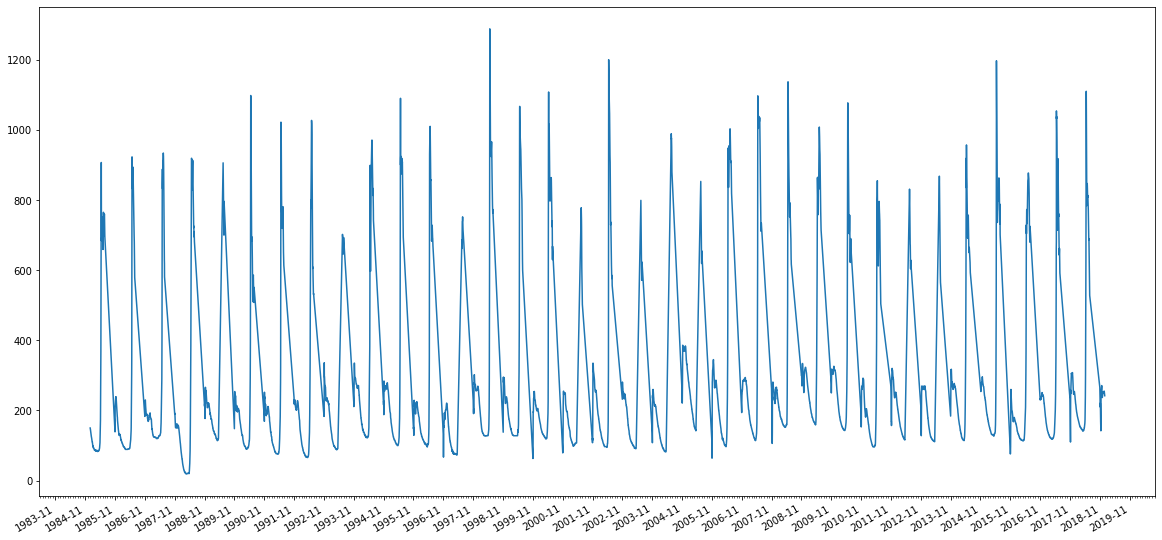

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot('date', 'stage_max', data=X_train)
fmt_half_year = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(fmt_half_year)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.format_xdata = mdates.DateFormatter('%Y-%m')

fig.autofmt_xdate()
plt.show()

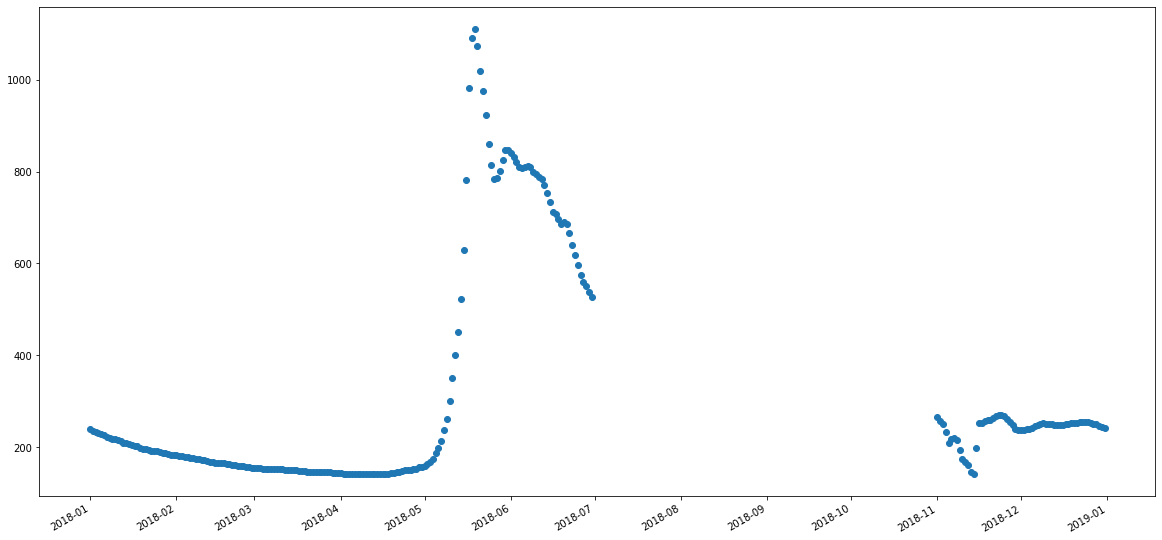

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot('date', 'stage_max', data=X_train[X_train.date >= '2018-01-01'], linestyle='none', marker='o')
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.format_xdata = mdates.DateFormatter('%Y-%m')

fig.autofmt_xdate()
plt.show()

In [5]:
col = X_train[X_train.date >= '2018-01-01'].date

In [6]:
seq_params = {'seq0': {'case': 'next_values', # тип задачи, которую решаем - предсказание следующих значений ряда
                           'params': {'n_target': 7, # число точек, на сколько вперед предсказываем
                                      'history': 7, # размер истории для подсчета признаков
                                      'step': 1, # шаг, через сколько точек взять следующие наблюдение
                                      'from_last': True, # датасет заканчивается на последнем доступном наблюдении 
                                      'test_last': False # предсказывать только последний участок из теста
                                     }},}
params = {'trend': False}

In [7]:
%%time

# трейн датасет
train = X_train.iloc[:-len(col)].copy().fillna(0)
# тест датасет
# +7 точек пересечения с трейном для подсчета признаков на первую дату теста
test = X_train.iloc[-(len(col)+7):].copy().fillna(0)

roles = {'target': 'stage_max',
         DatetimeRole(seasonality=('d', 'm', 'doy')): 'date'}
task = Task('multi:reg', greater_is_better=False, metric='mae', loss='mae')
model = AutoTS(task, seq_params=seq_params, params=params)

oof_pred_seq, median = model.fit_predict(train, roles)
pred, trend = model.predict(test)

multi:reg isn`t supported in lgb


I0907 23:38:36.418478 140218299131712 utils.py:129] Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
I0907 23:38:36.419775 140218299131712 utils.py:141] NumExpr defaulting to 8 threads.


[23:38:36] Layer 1 train process start. Time left 9999999999.87 secs
[23:38:37] Start fitting Lvl_0_Pipe_0_Mod_0_RFSklearn ...
[23:38:37] Training params: {'bootstrap': True, 'ccp_alpha': 0.0, 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': 4, 'oob_score': False, 'random_state': 42, 'warm_start': False, 'verbose': 0}
[23:38:37] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_RFSklearn =====
[23:39:09] Score for RF model: -14.769998
[23:39:09] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_RFSklearn =====
[23:39:42] Score for RF model: -16.971900
[23:39:42] Fitting Lvl_0_Pipe_0_Mod_0_RFSklearn finished. score = -15.870801534342771
[23:39:42] Lvl_0_Pipe_0_Mod_0_RFSklearn fitting and predicting completed
[23:39:42] Time left 9999999934.02 secs

[23:39:43] Start fitting

[23:41:04] 200:	learn: 135.6252985	test: 173.2657478	best: 173.2657478 (200)	total: 4.82s	remaining: 1m 7s
[23:41:06] 300:	learn: 114.9380314	test: 161.7761034	best: 161.7761034 (300)	total: 7.05s	remaining: 1m 3s
[23:41:09] 400:	learn: 100.0682104	test: 154.9753698	best: 154.9753698 (400)	total: 9.18s	remaining: 59.5s
[23:41:11] 500:	learn: 89.3652265	test: 151.1240983	best: 151.1240983 (500)	total: 11.3s	remaining: 56.5s
[23:41:13] 600:	learn: 79.3469598	test: 146.6035607	best: 146.6035607 (600)	total: 13.5s	remaining: 54s
[23:41:15] 700:	learn: 71.5144987	test: 144.2622095	best: 144.2622095 (700)	total: 15.7s	remaining: 51.6s
[23:41:17] 800:	learn: 65.0586293	test: 142.3340988	best: 142.3332101 (799)	total: 17.9s	remaining: 49.2s
[23:41:20] 900:	learn: 59.5216036	test: 140.8948371	best: 140.8948371 (900)	total: 20.1s	remaining: 46.8s
[23:41:22] 1000:	learn: 54.3093882	test: 139.4754908	best: 139.4754908 (1000)	total: 22.3s	remaining: 44.5s
[23:41:24] 1100:	learn: 49.9330504	test: 13

In [8]:
# структура предсказаний
# pred:
# pred[0] - предсказание на первых history теста,
# в нашем случае - с признаков последней недели трейна на первую неделю теста
# pred[-1] - предсказание последние history теста,
# в нашем случае это признаки последних 7 дней тестовых данных на неизветное для нас будущее.

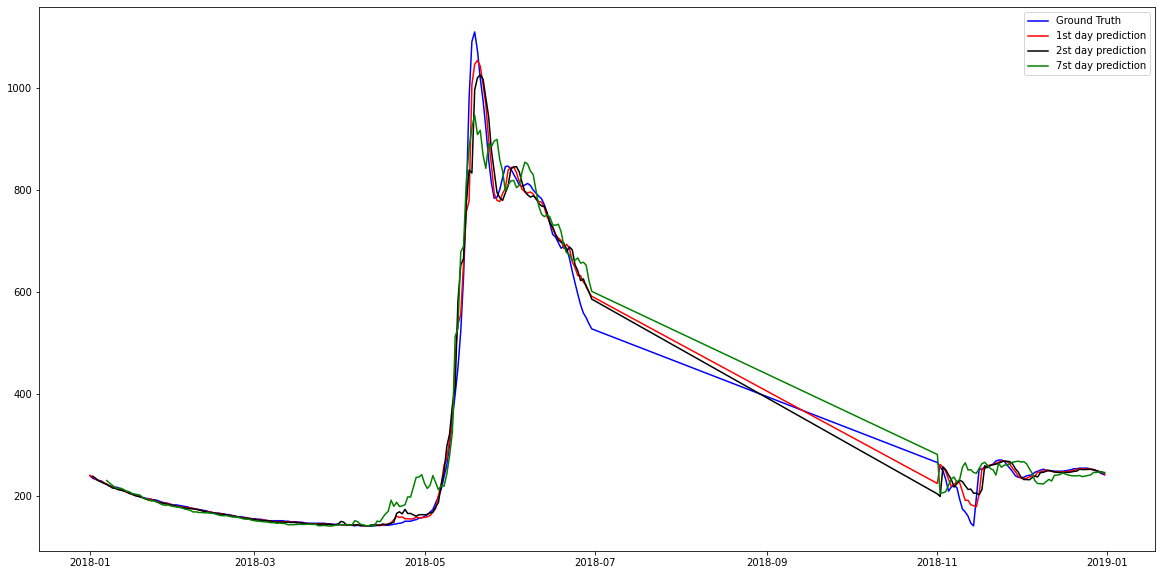

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(col, test.stage_max.values[7:], c='b', label='Ground Truth')
ax.plot(col, pred[:-1, 0], c='r', label='1st day prediction')
ax.plot(col, [np.NaN] * 1 + list(pred[:-2, 1]), c='k', label='2st day prediction')
ax.plot(col, [np.NaN] * 6 + list(pred[:-7, 6]), c='g', label='7st day prediction')
plt.legend()
plt.show()

In [10]:
# на текущий момент не хотим считать метрику по 7 наблюдениям перед обрывом в наблюденяих,
# так как там неправильно собирается целевая переменная и предикт (на данных с июня предсказываем ноябрь)
COND = ((col <= '2018-06-23') | (col > '2018-06-30')).values

In [11]:
for i in range(7):
    print("Day {}, MAE: {}".format(i,
                                   np.round(median_absolute_error(test[roles['target']].values[7:][COND][i:],
                                                                  pred[:-1][COND][:-i, i] if i!= 0 else pred[:-1][COND][:, i]), 4)))

Day 0, MAE: 1.8224
Day 1, MAE: 2.714
Day 2, MAE: 3.7131
Day 3, MAE: 4.7319
Day 4, MAE: 5.3005
Day 5, MAE: 5.6982
Day 6, MAE: 7.3017


## Сравнение с бейзлайнами:

### Медиана по дню недели.

In [12]:
train_c = train[['date', 'stage_max']].copy()
test_c = test[['date', 'stage_max']].iloc[7:].copy()
for df in [train_c, test_c]:
    df['dayofyear'] = pd.to_datetime(df.date).dt.dayofyear
    
statistic = train_c.groupby('dayofyear')['stage_max'].apply(np.median)
pred_naive = test_c.dayofyear.map(statistic)
print("Naive, MAE: {}".format(np.round(median_absolute_error(test_c[roles['target']].values[COND], pred_naive[COND]), 4)))

Naive, MAE: 31.0


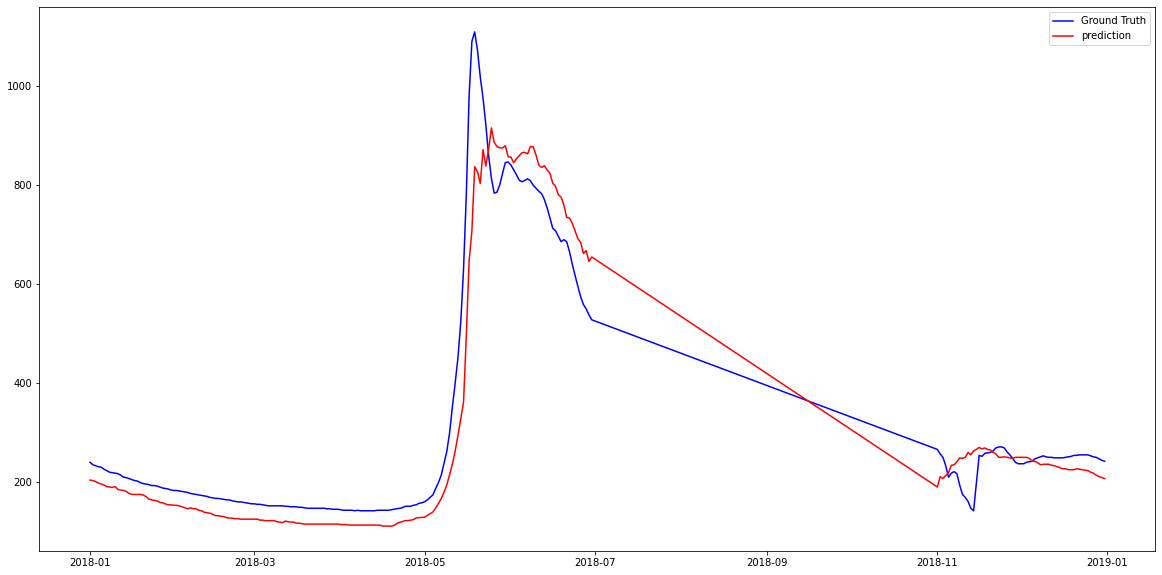

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(col, test.stage_max.values[7:], c='b', label='Ground Truth')
ax.plot(col, pred_naive.values, c='r', label='prediction')

plt.legend()
plt.show()

### Значение за предыдущий год.

In [14]:
train_c = train[['date', 'stage_max']].copy()
train_c = train_c[train_c.date >= '2017-01-01']
test_c = test[['date', 'stage_max']].iloc[7:].copy()
for df in [train_c, test_c]:
    df['dayofyear'] = pd.to_datetime(df.date).dt.dayofyear
    
statistic = train_c.groupby('dayofyear')['stage_max'].apply(np.median)
pred_naive = test_c.dayofyear.map(statistic)
print("Naive, MAE: {}".format(np.round(median_absolute_error(test_c[roles['target']].values[COND], pred_naive[COND]), 4)))

Naive, MAE: 34.0


### Эвристика с ТОП2 private lb хакатона.

In [15]:
train_c = train[['date', 'stage_max']].copy()
test_c = test[['date', 'stage_max']].iloc[7:].copy()
for df in [train_c, test_c]:
    df['year'] = pd.to_datetime(df.date).dt.year
    df['dayofyear'] = pd.to_datetime(df.date).dt.dayofyear


df_avg = []
for pair, group in train_c.groupby(['year']):
    avg_at_year = pd.concat([group['stage_max'].shift(i) for i in range(-10, 10)], axis=1).mean(axis=1)
    avg_at_year = pd.DataFrame(avg_at_year, columns=['stage_max_avg'])
    avg_at_year['year'] = pair
    avg_at_year['date'] = group['date']
    df_avg.append(avg_at_year)
df_avg = pd.concat(df_avg)
df_avg['dayofyear'] =  pd.to_datetime(df_avg['date']).dt.dayofyear
statistic2 = df_avg.groupby(['dayofyear'])['stage_max_avg'].median()

pred_naive2 = test_c.dayofyear.map(statistic2)
print("Naive 2, MAE: {}".format(np.round(median_absolute_error(test_c[roles['target']].values[COND], pred_naive2[COND]), 4)))


Naive 2, MAE: 30.5


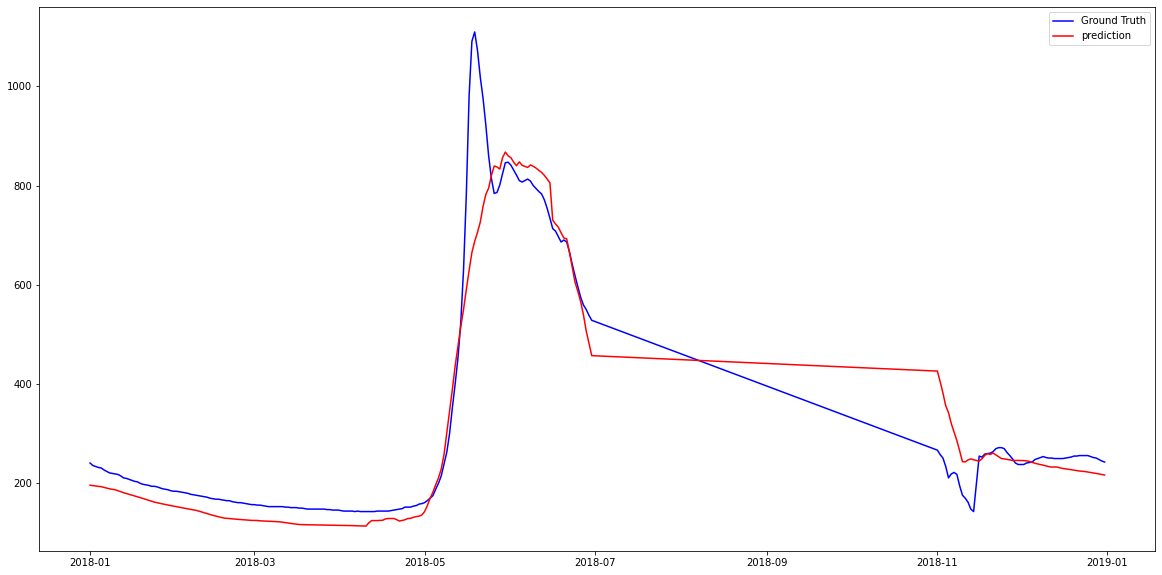

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(col, test.stage_max.values[7:], c='b', label='Ground Truth')
ax.plot(col, pred_naive2.values, c='r', label='prediction')

plt.legend()
plt.show()

### Медиана в скользящем окне размера 7.

In [17]:
train_c = train[['date', 'stage_max']].copy()
test_c = test[['date', 'stage_max']].copy()

pred_rolling = test_c.rolling(7).median().dropna().values.flatten()[:-1]    
for i in range(7):
    print("Day {}, MAE: {}".format(i,
                                   np.round(median_absolute_error(test[roles['target']].values[7:][COND][i:],
                                                                  pred_rolling[COND][:-i] if i!=0 else pred_rolling[COND]), 4)))

Day 0, MAE: 6.0
Day 1, MAE: 7.0
Day 2, MAE: 8.0
Day 3, MAE: 9.0
Day 4, MAE: 10.0
Day 5, MAE: 11.0
Day 6, MAE: 12.0


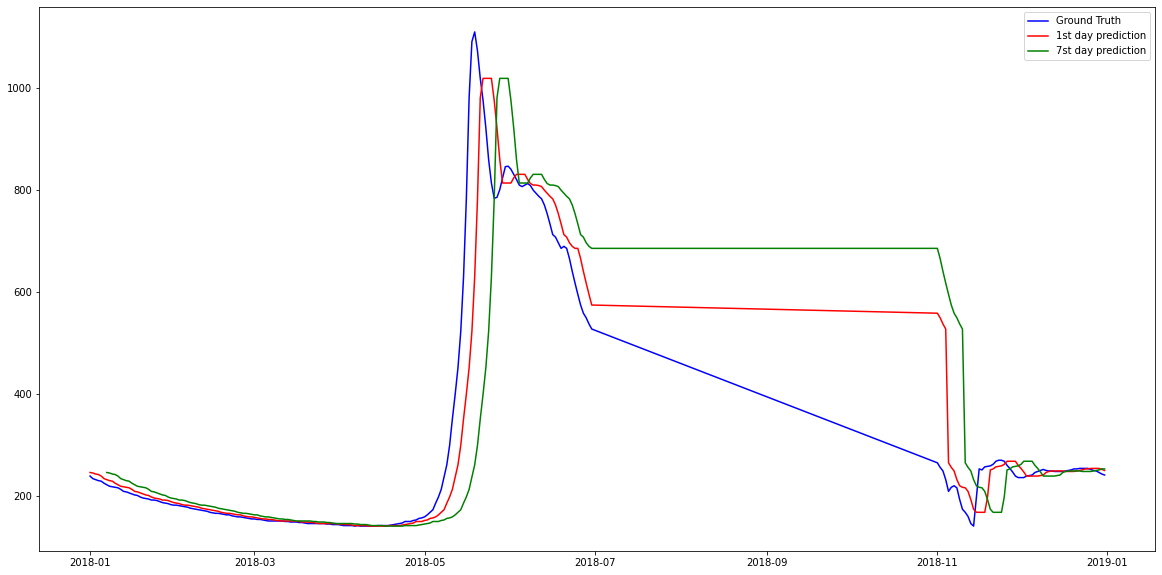

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(col, test.stage_max.values[7:], c='b', label='Ground Truth')
ax.plot(col, pred_rolling, c='r', label='1st day prediction')
ax.plot(col, [np.NaN] * 6 + list(pred_rolling[:-6]), c='g', label='7st day prediction')
plt.legend()
plt.show()

### Предсказание последним известным значением.

In [19]:
def get_last(x):
    return list(x)[-1]

train_c = train[['date', 'stage_max']].copy()
test_c = test[['date', 'stage_max']].copy()

pred_rolling_last = test_c.rolling(7).apply(get_last).dropna().values.flatten()[:-1]
for i in range(7):
    print("Day {}, MAE: {}".format(i,
                                   np.round(median_absolute_error(test[roles['target']].values[7:][COND][i:],
                                                                  pred_rolling_last[COND][:-i] if i!=0 else pred_rolling_last[COND]), 4)))

Day 0, MAE: 1.0
Day 1, MAE: 3.0
Day 2, MAE: 4.0
Day 3, MAE: 6.0
Day 4, MAE: 7.0
Day 5, MAE: 8.0
Day 6, MAE: 9.0


#### Еще раз метрики модели

In [20]:

for i in range(7):
    print("Day {}, MAE: {}".format(i,
                                   np.round(median_absolute_error(test[roles['target']].values[7:][COND][i:],
                                                                  pred[:-1][COND][:-i, i] if i!= 0 else pred[:-1][COND][:, i]), 4)))

Day 0, MAE: 1.8224
Day 1, MAE: 2.714
Day 2, MAE: 3.7131
Day 3, MAE: 4.7319
Day 4, MAE: 5.3005
Day 5, MAE: 5.6982
Day 6, MAE: 7.3017


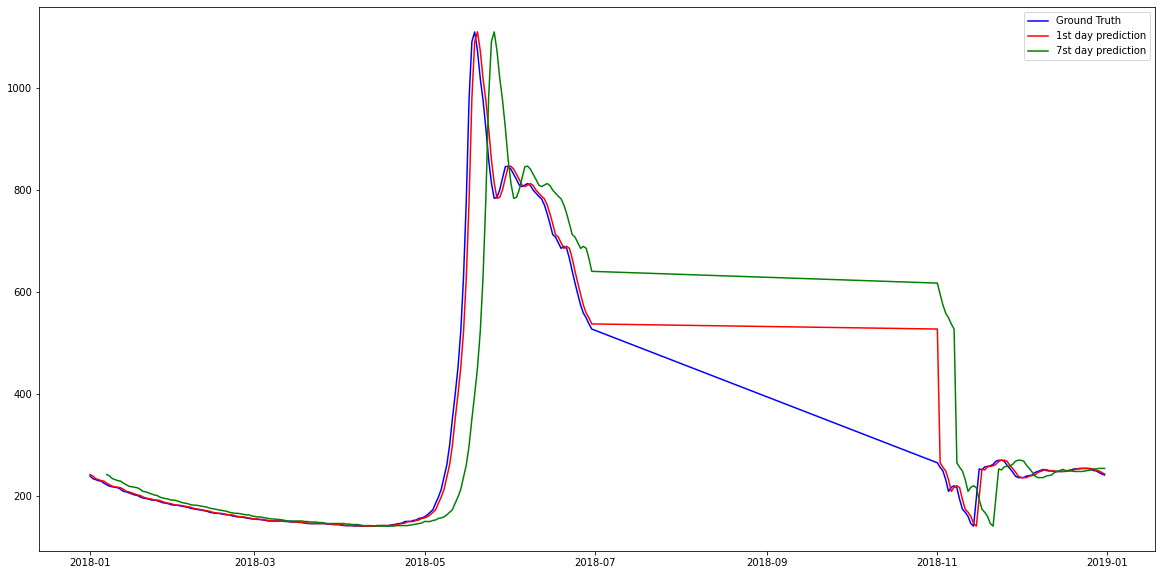

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(col, test.stage_max.values[7:], c='b', label='Ground Truth')
ax.plot(col, pred_rolling_last, c='r', label='1st day prediction')
ax.plot(col, [np.NaN] * 6 + list(pred_rolling_last[:-6]), c='g', label='7st day prediction')
plt.legend()
plt.show()